<a href="https://colab.research.google.com/github/Sruthij93/CC_Fraud_Detection/blob/main/CreditCardFraudDetect_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [19]:
sns.set_style(style = "whitegrid")
plt.figure(figsize =(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

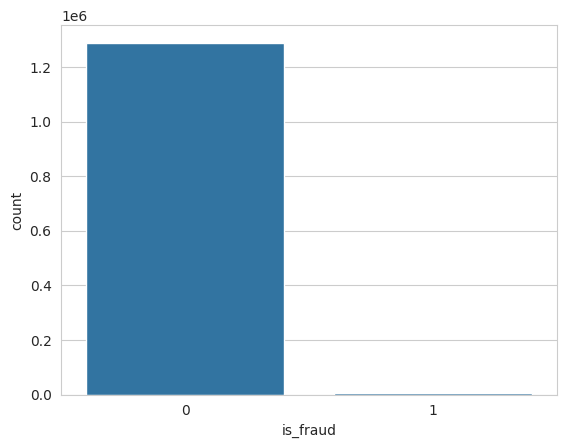

In [20]:
sns.countplot(x = "is_fraud", data = df_train)
plt.show()

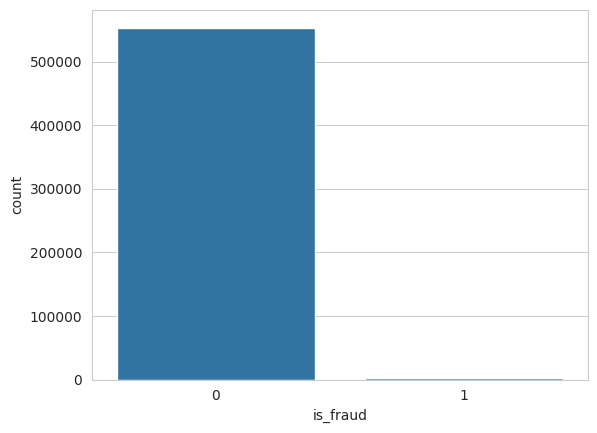

In [21]:
sns.countplot(x = "is_fraud", data = df_test)
plt.show()

In [22]:
# Since df_test has more rows and the data is highly imbalanced, we will concatenate both dfs and use train_test_split later on
df = pd.concat([df_train, df_test], ignore_index=True)

In [23]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [24]:
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [26]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [27]:
df["merchant"].nunique()

693

<ipython-input-28-053581e77911>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fraud_txn = df_train[df["is_fraud"] == 1]


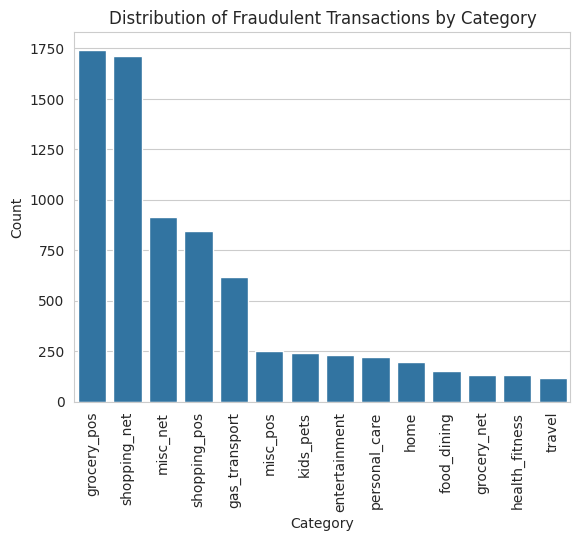

In [28]:
#  Which category has the highest fraudulent transactions
fraud_txn = df_train[df["is_fraud"] == 1]
sns.countplot(data = fraud_txn, x = "category", order = fraud_txn["category"].value_counts().index)
plt.title("Distribution of Fraudulent Transactions by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()


So the highest number of frauds take place in POS grocery and online shopping transactions and the lowest in travel transactions.



















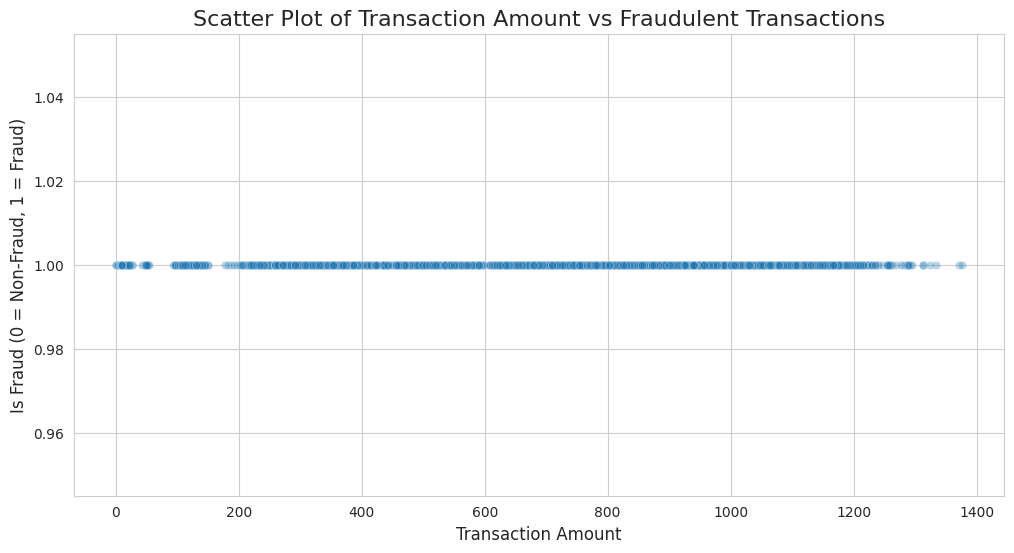

In [29]:
plt.figure(figsize=(12, 6))

# Scatter plot of transaction amount vs fraud
sns.scatterplot(x='amt', y='is_fraud', data=fraud_txn, alpha=0.3)

# Add title and labels
plt.title('Scatter Plot of Transaction Amount vs Fraudulent Transactions', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Is Fraud (0 = Non-Fraud, 1 = Fraud)', fontsize=12)

plt.show()

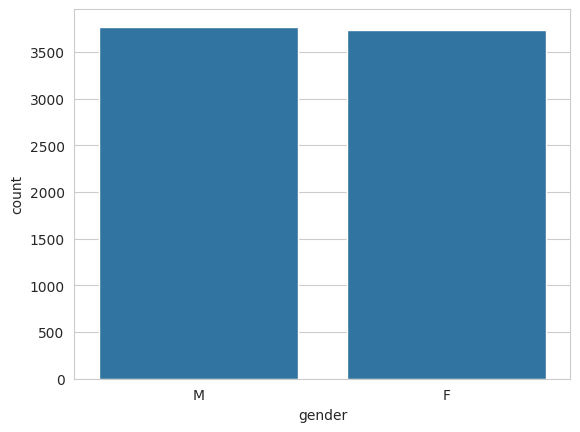

In [30]:
# Checking relation between gender and is_fraud transanctions
sns.countplot(data = fraud_txn, x = "gender", order = fraud_txn["gender"].value_counts().index)
plt.show()

# **Data Cleaning and Preprocessing**

In [31]:
# Add a column with calculated age of card owner
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.to_datetime('today').year - df['dob'].dt.year)

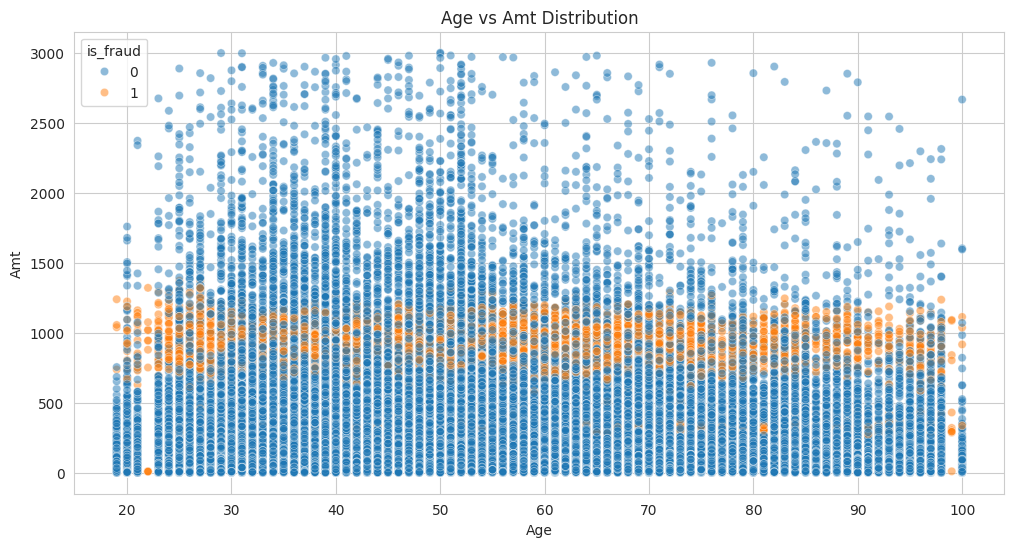

In [32]:
#  checking age vs amt wrt fraud or not
plt.figure(figsize=(12, 6))

# Scatter plot of age vs transaction fraud or not with amt between 0-5000
sns.scatterplot(x='age', y='amt', data=df[(df['amt'] <= 3000) & (df['amt'] > 0)], hue='is_fraud', alpha=0.5)
plt.title('Age vs Amt Distribution')
plt.xlabel('Age')
plt.ylabel('Amt')
plt.show()

Checked the graph distribution of amt wrt to is_fraud and it shows that amt falls between 700 to 1250 for fraud transactions.
Ages above 20 are victims for fraud transactions.

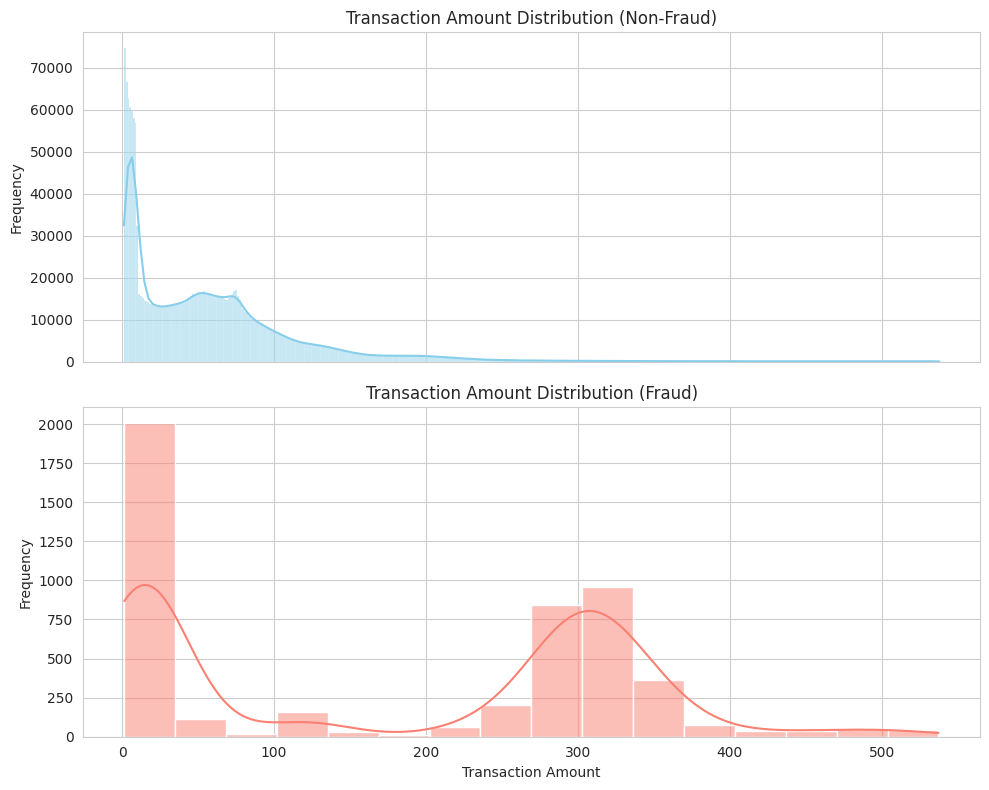

In [33]:
# prompt: plot a histogram for transaction amount and is_fraud. Exclude the outliers. Have independent y axis for both (fraud and not fraud)

# Calculate quantiles for outlier removal (adjust as needed)
lower_bound = df['amt'].quantile(0.01)
upper_bound = df['amt'].quantile(0.99)

# Filter out outliers
filtered_df = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)]

# Create the histogram
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True) # Share x-axis


# Plot for non-fraudulent transactions
sns.histplot(filtered_df[filtered_df['is_fraud'] == 0]['amt'], ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Transaction Amount Distribution (Non-Fraud)')
axes[0].set_ylabel('Frequency')

# Plot for fraudulent transactions
sns.histplot(filtered_df[filtered_df['is_fraud'] == 1]['amt'], ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Transaction Amount Distribution (Fraud)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Transaction Amount')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

plt.show()

In [34]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,58
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,25
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,43
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,59
1852393,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0,31


In [35]:
df.dropna(inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  object        
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    datetime64[ns]
 18  trans_num             

In [37]:
# Add distance between merchant and cardholder location
from geopy.distance import geodesic

def calculate_distance(row):
    merchant_loc = (row["merch_lat"], row["merch_long"])
    cardholder_loc = (row["lat"], row["long"])
    return geodesic(merchant_loc, cardholder_loc).miles

df["distance"] = df.apply(calculate_distance, axis = 1)

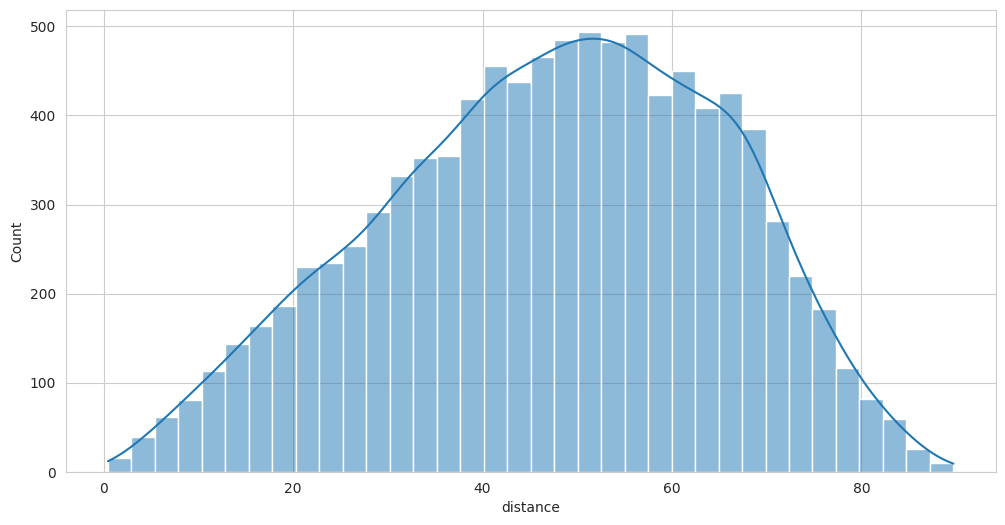

In [38]:
# plot a histogram to check relation between distance and is_fraud
fraud_txn = df[df["is_fraud"] == 1]
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud_txn, x=fraud_txn["distance"], kde=True)
plt.show()

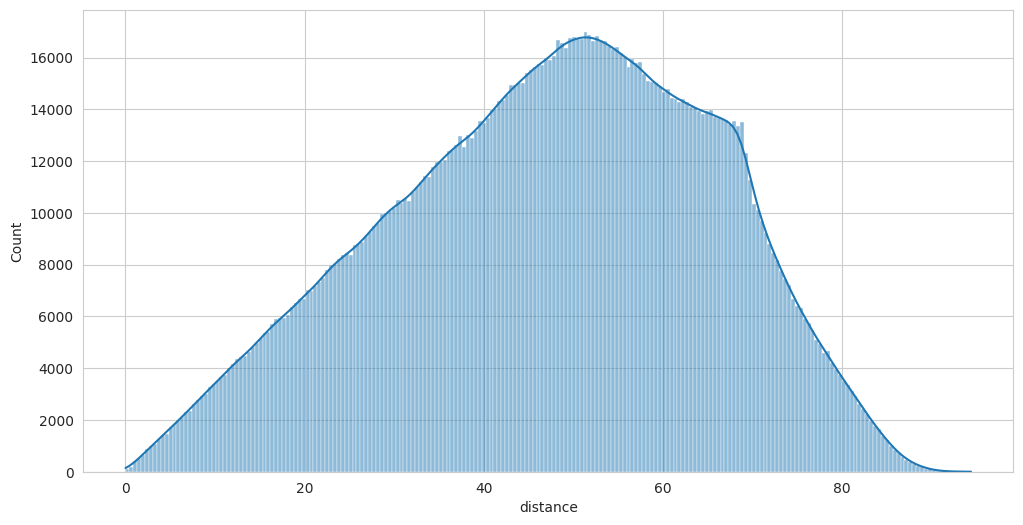

In [39]:
# plot a histogram to check relation between distance and is_fraud
non_fraud_txn = df[df["is_fraud"] == 0]
plt.figure(figsize=(12, 6))
sns.histplot(data=non_fraud_txn, x=non_fraud_txn["distance"], kde=True)
plt.show()

Distance between merchant and cardholder's locations don't seem to have a big impact on fraudulent transactions.

In [40]:
# run hypothesis test to check mean between above two graphs
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(fraud_txn["distance"], non_fraud_txn["distance"])
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 0.4922300603128724
P-value: 0.6225567744996292


p-value is very high, that means mean for both are equal.

In [41]:
# rounding off decimal places of distance to 2
df["distance"] = df["distance"].round(2)

In [42]:
# Getting Transaction hour and day of the week in separate columns
df["trans_hour"] = pd.to_datetime(df["trans_date_trans_time"]).dt.hour

df["trans_day_of_week"] = pd.to_datetime(df["trans_date_trans_time"]).dt.dayofweek

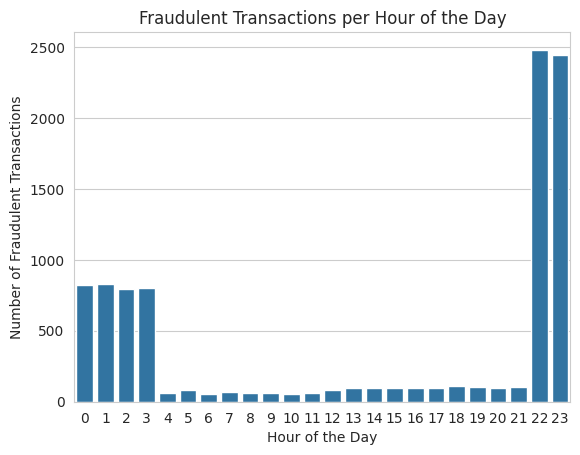

In [43]:
# Plotting the relation between hour of the day and fraud transactions
sns.countplot(x='trans_hour', data=df[df['is_fraud'] == 1])
plt.title('Fraudulent Transactions per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

Fraudulent transactions happen during the late hours or very early hours of the day. Therefore, this seems to be a good feature to predict whether it is a fraudulent transaction or not.

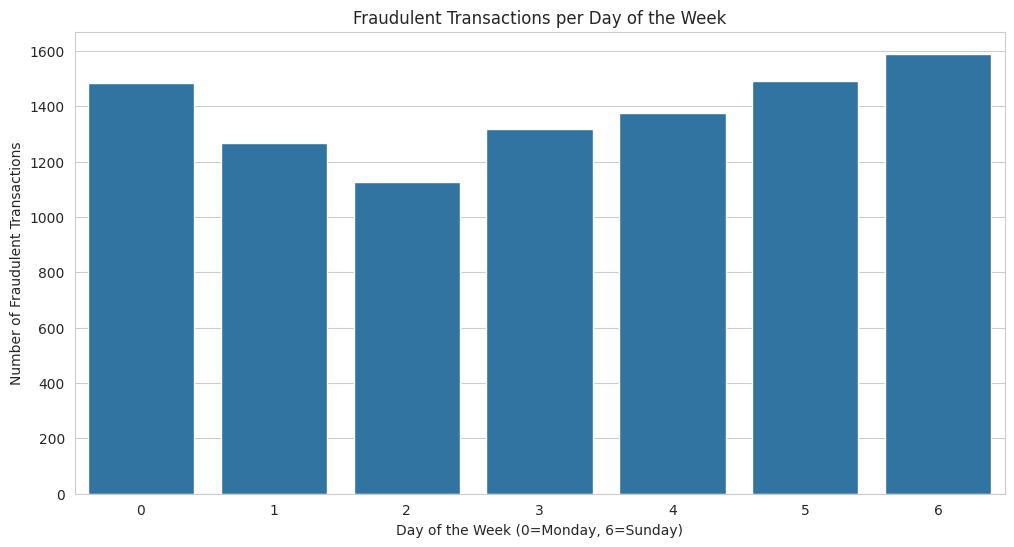

In [44]:
# Plotting the relation between day of the week and fraud transactions
plt.figure(figsize=(12, 6))
sns.countplot(x='trans_day_of_week', data=df[df['is_fraud'] == 1])
plt.title('Fraudulent Transactions per Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

Day of week doesn't seem to have much influence over fraudulent transactions.

# **Encoding the categorical features**


In [45]:
# One hot encoding of category and gender columns
df = pd.get_dummies(df, columns =["category"], drop_first = True)

df = pd.get_dummies(df, columns=["gender"])

In [46]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'amt',
       'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'distance', 'trans_hour',
       'trans_day_of_week', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_F', 'gender_M'],
      dtype='object')

In [47]:
# Check if merchant names have a good correlation with fraudulent transactions
merchant_fraud_counts = df.groupby('merchant')["is_fraud"].sum().reset_index()
merchant_fraud_counts = merchant_fraud_counts.rename(columns={"is_fraud":"fraud_count"})

# get the top 20 merchant names with hhighest fraud counts
top_merchants = merchant_fraud_counts.sort_values(by="fraud_count", ascending=False).head(20)


In [48]:
top_merchants

,merchant,fraud_count
316,fraud_Kilback LLC,62
337,fraud_Kozey-Boehm,60
494,fraud_Rau and Sons,60
146,fraud_Doyle Ltd,57
616,fraud_Terry-Huel,56
70,fraud_Boyer PLC,55
349,fraud_Kuhn LLC,55
428,"fraud_Moen, Reinger and Murphy",53
105,fraud_Cormier LLC,53
309,fraud_Kiehn-Emmerich,53


In [49]:
# get the merchant names with lowest number of fraud txns (count greater than 0)
merchant_frauds = merchant_fraud_counts[merchant_fraud_counts["fraud_count"] > 0]
bot_merchants = merchant_frauds.sort_values(by="fraud_count", ascending=False).tail(20)

In [50]:
merchant_frauds.describe()

,fraud_count
count,685.000000
mean,14.089051
std,14.701393
min,1.000000
25%,4.000000
50%,7.000000
75%,20.000000
max,62.000000


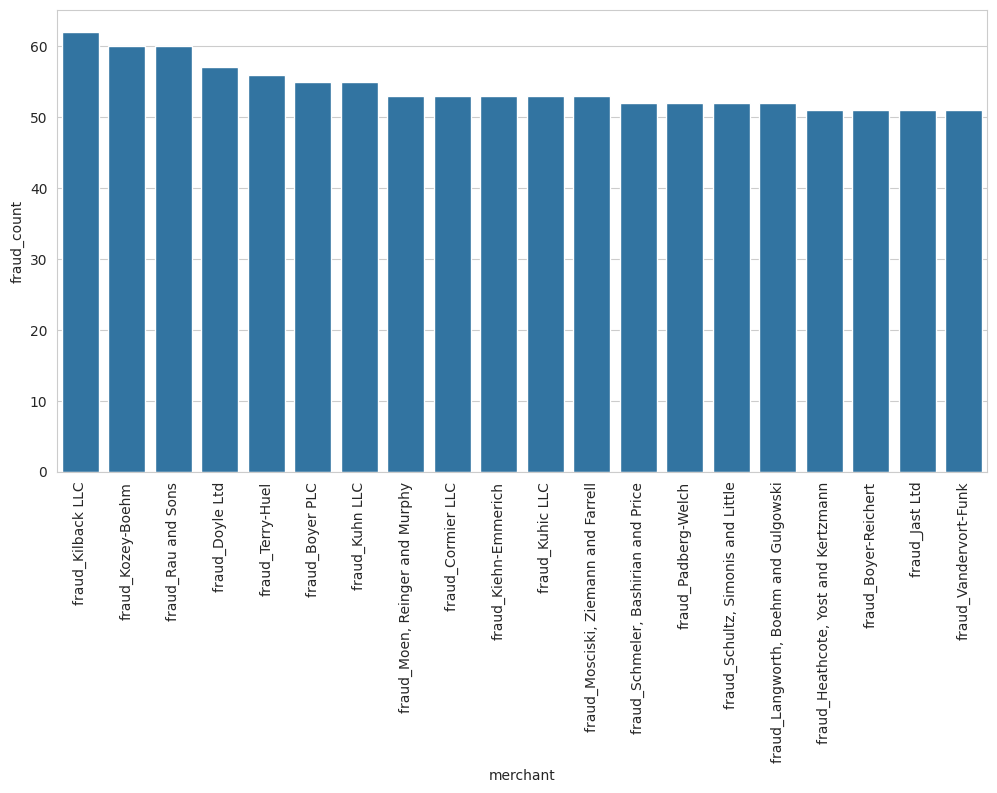

In [51]:
# plot the graph showing top merchants
plt.figure(figsize=(12, 6))
sns.barplot(x="merchant", y = "fraud_count", data = top_merchants)
plt.xticks(rotation = 90)
plt.show()

In [52]:
bot_merchants

,merchant,fraud_count
600,"fraud_Stokes, Christiansen and Sipes",2
501,"fraud_Reichel, Bradtke and Blanda",1
671,fraud_Windler LLC,1
129,fraud_Deckow-Dare,1
490,"fraud_Prosacco, Kreiger and Kovacek",1
476,"fraud_Parker, Nolan and Trantow",1
515,fraud_Rippin-VonRueden,1
464,fraud_Ortiz Group,1
436,fraud_Morar Inc,1
527,fraud_Romaguera and Sons,1


In [53]:
#  checking if state has any relation with fraudulent transactions
state_fraud_counts = df.groupby('state')["is_fraud"].sum().reset_index()
state_fraud_counts = state_fraud_counts.rename(columns={"is_fraud":"fraud_count"})

# get the top 20 states  with hhighest fraud counts
top_states = state_fraud_counts.sort_values(by="fraud_count", ascending=False).head(20)

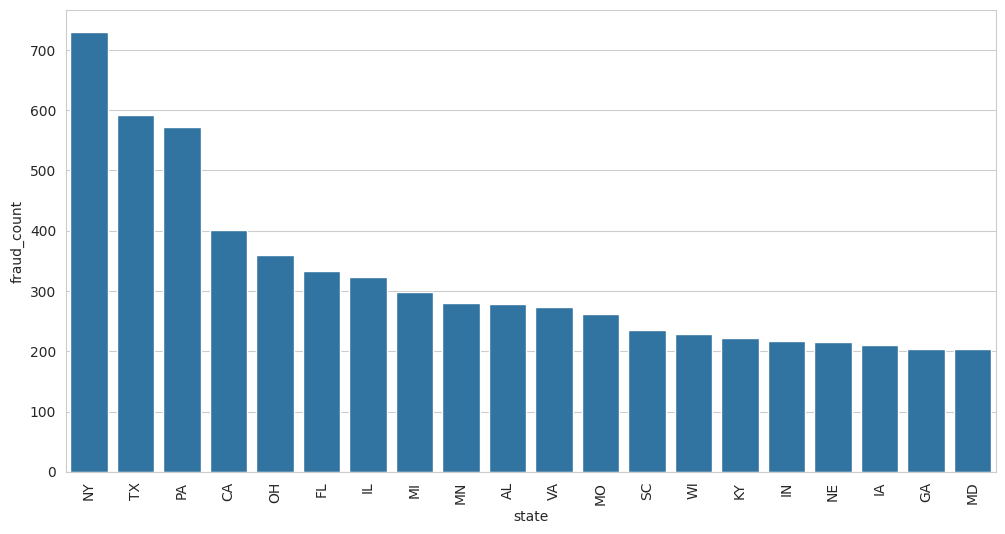

In [54]:
# plot the top states
plt.figure(figsize=(12, 6))
sns.barplot(x="state", y = "fraud_count", data = top_states)
plt.xticks(rotation = 90)
plt.show()

In [55]:
#  checking if job has any relation with fraudulent transactions
job_fraud_counts = df.groupby('job')["is_fraud"].sum().reset_index()
job_fraud_counts = job_fraud_counts.rename(columns={"is_fraud":"fraud_count"})

# get the top 20 states  with hhighest fraud counts
top_jobs = job_fraud_counts.sort_values(by="fraud_count", ascending=False).head(20)

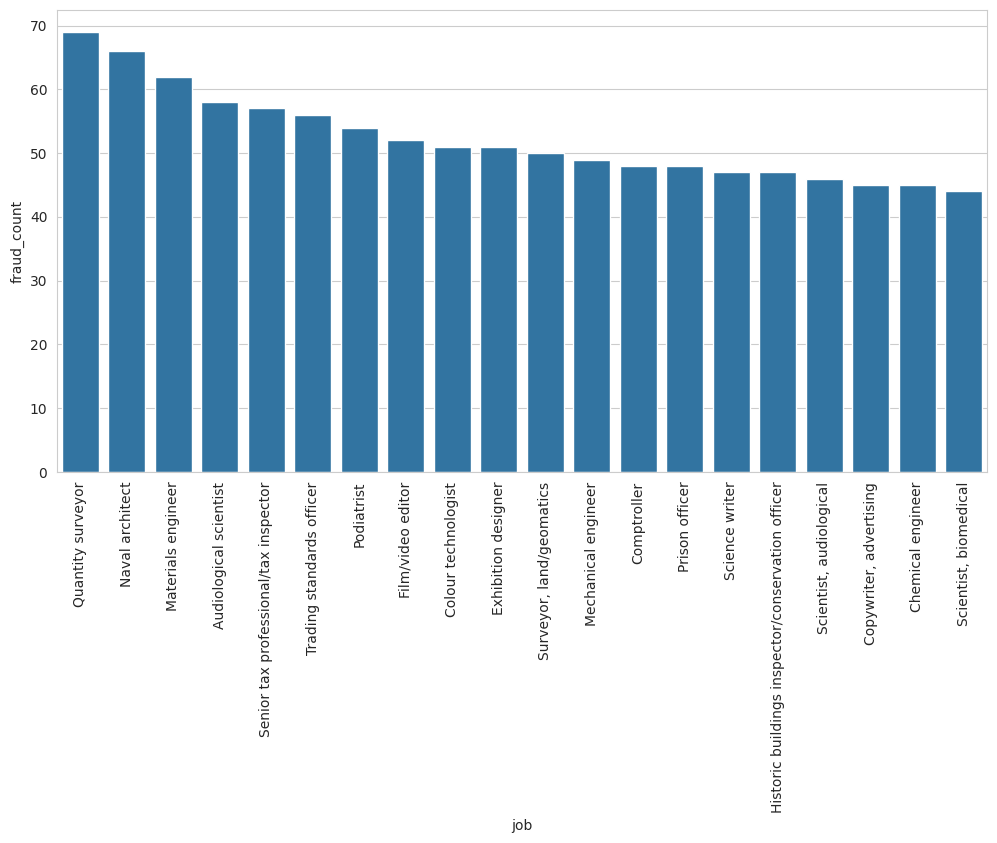

In [56]:
# plot the top states
plt.figure(figsize=(12, 6))
sns.barplot(x="job", y = "fraud_count", data = top_jobs)
plt.xticks(rotation = 90)
plt.show()

In [57]:
# Encode merchant names and states using label encoder
from sklearn.preprocessing import LabelEncoder


In [58]:
label_encoder = LabelEncoder()
df["merchant_encoded"] = label_encoder.fit_transform(df['merchant'])

In [87]:
with open('merchant_label_encoder.pkl', 'wb') as file:
  pickle.dump(label_encoder, file)

In [59]:
state_encoder = LabelEncoder()
df["state_encoded"] = state_encoder.fit_transform(df['state'])

In [ ]:
with open('state_label_encoder.pkl', 'wb') as file:
  pickle.dump(state_encoder, file)

In [60]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'amt',
       'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'distance', 'trans_hour',
       'trans_day_of_week', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_F', 'gender_M', 'merchant_encoded', 'state_encoded'],
      dtype='object')

In [61]:
# Drop unwanted columns
df_final = df.drop(columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'])

In [62]:
df_final.head()

,amt,city_pop,is_fraud,age,distance,trans_hour,trans_day_of_week,category_food_dining,category_gas_transport,category_grocery_net,...,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,merchant_encoded,state_encoded
0,4.97,3495,0,36,48.95,0,1,False,False,False,...,True,False,False,False,False,False,True,False,514,27
1,107.23,149,0,46,18.78,0,1,False,False,False,...,False,False,False,False,False,False,True,False,241,47
2,220.11,4154,0,62,67.17,0,1,False,False,False,...,False,False,False,False,False,False,False,True,390,13
3,45.00,1939,0,57,59.46,0,1,False,True,False,...,False,False,False,False,False,False,False,True,360,26
4,41.96,99,0,38,48.28,0,1,False,False,False,...,False,True,False,False,False,False,False,True,297,45


#**Split the data**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [64]:
features = df_final.drop(columns = ["is_fraud"], axis = 1)
target = df_final["is_fraud"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)


In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Save the scaler incase needed later on
with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)

In [68]:
X_train

array([[ 0.60246272, -0.29240686,  1.56910393, ...,  1.10100093,
        -1.56148637,  0.44174992],
       [-0.256872  , -0.17816713,  0.13148503, ..., -0.90826445,
         0.96062146, -1.58241334],
       [-0.20036797, -0.2928979 , -0.96110534, ..., -0.90826445,
        -0.94463948,  1.20953598],
       ...,
       [ 0.3001319 , -0.29287136, -0.27104827, ..., -0.90826445,
         1.67695978,  0.37195118],
       [-0.40177649, -0.29343539,  1.79912295, ...,  1.10100093,
         0.32885086, -0.25623741],
       [ 0.44005257, -0.29214143, -0.90360058, ..., -0.90826445,
        -1.65102866,  0.93034105]])

#**Train the ML models**

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [70]:
def evaluate_and_save_model(model, X_train, y_train, X_test, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("-----------------------")
  print(f"\n{model.__class__.__name__} Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
  print(f"\nClassification Report: \n", classification_report(y_test, y_pred))

  # save to pickle
  with open(filename, "wb") as file:
    pickle.dump(model, file)

  print(f"Model saved as {filename}")

In [71]:
# Logistic Regression
lr_model = LogisticRegression(random_state = 42)
evaluate_and_save_model(lr_model, X_train, y_train, X_test, y_test, "lr_model.pkl")

-----------------------

LogisticRegression Accuracy Score: 0.9944

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.03      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.51      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

Model saved as lr_model.pkl


In [72]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state = 42)
evaluate_and_save_model(dt_model, X_train, y_train, X_test, y_test, "dt_model.pkl")

-----------------------

DecisionTreeClassifier Accuracy Score: 0.9979

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.79      0.83      0.81      1953

    accuracy                           1.00    370479
   macro avg       0.90      0.91      0.90    370479
weighted avg       1.00      1.00      1.00    370479

Model saved as dt_model.pkl


In [73]:
# finding feature importances of the decision treee model
feature_importances_dt = dt_model.feature_importances_
feature_names = features.columns
feature_importances_df_dt = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_dt})
feature_importances_df_dt = feature_importances_df_dt.sort_values(by='Importance', ascending=False)

In [74]:
feature_importances_df_dt

,Feature,Importance
0,amt,0.270767
9,category_grocery_pos,0.205106
4,trans_hour,0.154304
2,age,0.102215
7,category_gas_transport,0.068306
1,city_pop,0.037539
3,distance,0.033674
21,merchant_encoded,0.025162
22,state_encoded,0.018851
20,gender_M,0.018586


In [75]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state = 42)
evaluate_and_save_model(rf_model, X_train, y_train, X_test, y_test, "rf_model.pkl")

-----------------------

RandomForestClassifier Accuracy Score: 0.9987

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.97      0.77      0.86      1953

    accuracy                           1.00    370479
   macro avg       0.98      0.89      0.93    370479
weighted avg       1.00      1.00      1.00    370479

Model saved as rf_model.pkl


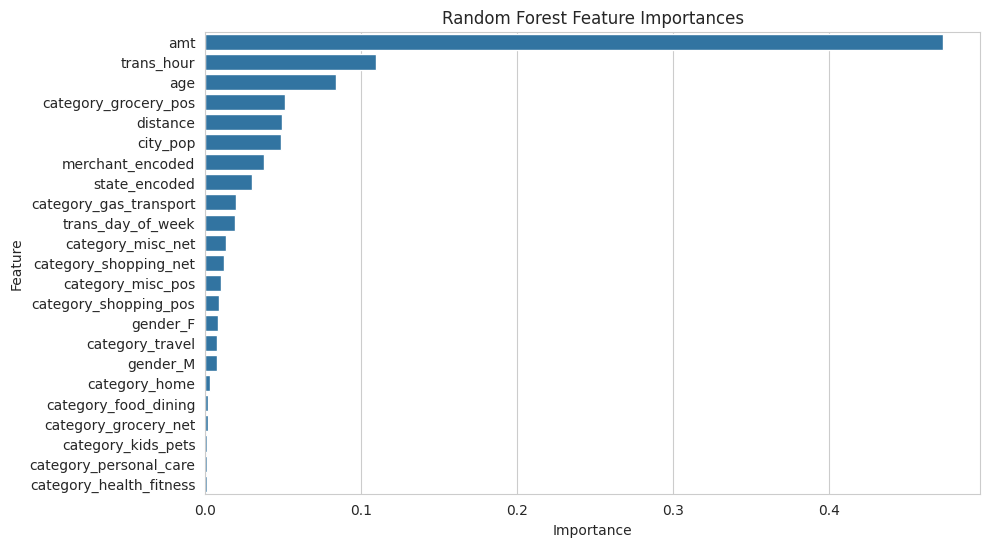

In [76]:
#  feature importances of this model
feature_importances_rf = rf_model.feature_importances_
feature_importances_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
feature_importances_df_rf = feature_importances_df_rf.sort_values(by='Importance', ascending=False)

#  plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_rf)
plt.title('Random Forest Feature Importances')
plt.show()

In [77]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state = 42)
evaluate_and_save_model(xgb_model, X_train, y_train, X_test, y_test, "xgb_model.pkl")

-----------------------

XGBClassifier Accuracy Score: 0.9988

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.95      0.82      0.88      1953

    accuracy                           1.00    370479
   macro avg       0.97      0.91      0.94    370479
weighted avg       1.00      1.00      1.00    370479

Model saved as xgb_model.pkl


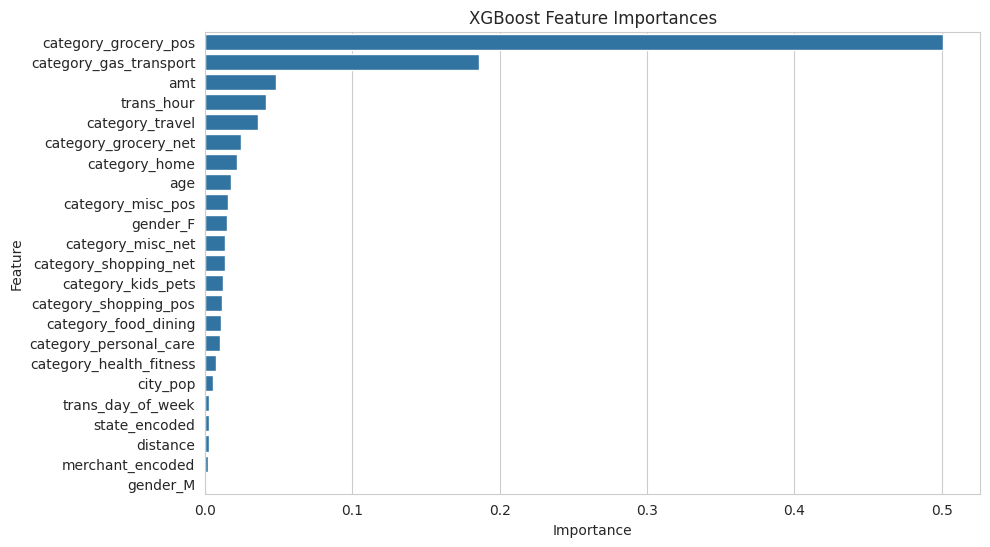

In [78]:
#  feature importances for this model
feature_importances_xgb = xgb_model.feature_importances_
feature_importances_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_xgb})
feature_importances_df_xgb = feature_importances_df_xgb.sort_values(by="Importance", ascending = False)

# plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_xgb)
plt.title('XGBoost Feature Importances')
plt.show()

In [79]:
# Naive Bayes
nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, y_train, X_test, y_test, "nb_model.pkl")

-----------------------

GaussianNB Accuracy Score: 0.9216

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    368526
           1       0.05      0.70      0.09      1953

    accuracy                           0.92    370479
   macro avg       0.52      0.81      0.52    370479
weighted avg       0.99      0.92      0.95    370479

Model saved as nb_model.pkl


In [80]:
# SVM
# svm_model = SVC(random_state = 42)
# evaluate_and_save_model(svm_model, X_train, y_train, X_test, y_test, "svm_model.pkl")

In [81]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state = 42)
evaluate_and_save_model(gb_model, X_train, y_train, X_test, y_test, "gb_model.pkl")

-----------------------

GradientBoostingClassifier Accuracy Score: 0.9978

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.87      0.70      0.77      1953

    accuracy                           1.00    370479
   macro avg       0.93      0.85      0.89    370479
weighted avg       1.00      1.00      1.00    370479

Model saved as gb_model.pkl


In [82]:
# Due to very high imbalance in the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [83]:
#  Running the xgb model again with resampled data
evaluate_and_save_model(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test, 'xgb_model_SMOTE.pkl')

-----------------------

XGBClassifier Accuracy Score: 0.9972

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.68      0.91      0.77      1953

    accuracy                           1.00    370479
   macro avg       0.84      0.95      0.89    370479
weighted avg       1.00      1.00      1.00    370479

Model saved as xgb_model_SMOTE.pkl


In [84]:
# trying out StratifiedKFold with cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [85]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
f1_scores = cross_val_score(xgb_model, X_train, y_train, cv = skf, scoring = "f1")
print(f"F1-scores: {f1_scores}")
print(f"Mean F1-score: {f1_scores.mean()}")

F1-scores: [0.87064677 0.87543737 0.87623066 0.87244538 0.85754584]
Mean F1-score: 0.8704612038565503


In [86]:
skf_smote = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
f1_scores_smote = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv = skf_smote, scoring = "f1")
print(f"F1-scores: {f1_scores_smote}")
print(f"Mean F1-score: {f1_scores_smote.mean()}")

F1-scores: [0.99741212 0.99740584 0.9975158  0.99768062 0.99737187]
Mean F1-score: 0.9974772516875399
